In [1]:
#This code is more general form which can be applied for any Keyword. We have a list of jobs in input.csv from that it takes jobs and iterates through it.


#importing all the required packages
import time
import requests
import urllib.request
from bs4 import BeautifulSoup
from csv import DictReader
import csv
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import pandas as pd
from datetime import datetime
from rake_nltk import rake,Metric
import operator
from nltk.corpus import stopwords
import nltk #Natural Language ToolKit
#nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

In [30]:
#using wordlist that is present in NLTK

stop_words=set(stopwords.words("english"))# we have imported stoplist, from that we are making set to compare it later on.
filtered_sent=[] # Here the Filtered_sent is the JobDescription, which contains skills as well as responsibilities.
#filtered_sent_1=[]
data = pd.read_csv("input.csv")    # We use pandas to read from our input.csv to get job list which we made.
info=data["Job-1"]  # We call on header to get the entire colomn of data. Column name is 'Job-1'
total=[]
for keywords in info: # making for loop to take one keyword at a time and pass throught the loop. kyeword is a serch term for a job as stored in the Jon-1 column in input.csv
    try: # using try and excecpt at end of code to ignore index error if any due to long computing time.
#Indeed
# Using Selenium to get the webpage for indeed 
        indeed=('https://www.indeed.com/jobs?q='+keywords+'&l=') # Here we are calling the keywords. So each time the loop begins the keywords will change.
        options = Options() # creating an options so that the page load in background.
        options.headless = True
        browser = webdriver.Firefox(options=options)#using firefox web drivers from selenium which we imported.
        browser.get(indeed)#fetching web page of indeed.
        desc_list = browser.find_element_by_id("resultsCol")# Here exactly we are selecting the whole row of Jobs available.We use find_id from selenium usaally used to go to the id listed.
        desc_list.click()# We are Clicking on the page to open the first job.
        page_source=browser.page_source
        desc_list = browser.find_element_by_xpath('//*[@id="vjs-tab-job"]').text # After we get the 1st job we are taking the job details.We use x_path from selenium usually used to go directly to path.
        browser.close()# closing the browser to save memory.

        tokenized_word=word_tokenize(desc_list)# breaking sentence into words by tokenize. This is imported from nltk. desc_list is a full pragagraph extarcted from the job descrition matching the search term at indeed.com
        for w in tokenized_word:
            if w not in stop_words:# Comparing words with stopwords and removing which match.
                filtered_sent.append(w) # finally appending the final data to the filtered_sent.
        #Glassdoor

        # Using Selenium to get the webpage for glassdoor 

        glassdoor = 'https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword=&locT=&locId=0&jobType=&context=Jobs&sc.keyword='+keywords+'&dropdown=0'
        options = Options()# creating an options so that the page load in background.
        options.headless = True
        browser = webdriver.Firefox(options=options)#using firefox web drivers from selenium which we imported.
        browser.get(glassdoor)#fetching web page of glassdoor.
        browser.refresh
        view_page = browser.page_source
        desc_list = browser.find_element_by_xpath('//*[@id="JobDescriptionContainer"]/div[1]').text#USing xpath as before to get the job JobDescription
        browser.close()# closing the browser to save memory.

        tokenized_word=word_tokenize(desc_list)# breaking sentence into words by tokenize. This is imported from nltk
        for w in tokenized_word:
            if w not in stop_words:# Comparing words with stopwords and removing which match.
                filtered_sent.append(w)# finally appending the final data to the filtered_sent.
        #Dice

        dice = ('https://www.dice.com/jobs?q='+keywords+'&countryCode=US&radius=30&radiusUnit=mi&page=1&pageSize=20&language=en')
        options = Options()# creating an options so that the page load in background.
        options.headless = True
        browser = webdriver.Firefox(options=options)#using firefox web drivers from selenium which we imported.
        browser.get(dice)#fetching web page of dice.
        desc_list = browser.find_element_by_xpath('/html/body/dhi-js-dice-client/div/dhi-search-page-container/dhi-search-page/div/dhi-search-page-results/div/div[3]/js-search-display/div/div[2]/dhi-search-cards-widget/div/dhi-search-card[1]/div/div[1]/div/div[2]/div[1]/h5')
        desc_list.click()# We are Clicking on the page to open the first job.
        view_page = browser.page_source
        #time.sleep(5)
        desc_list = browser.find_element_by_xpath('//*[@id="jobdescSec"]').text#Using xpath from selenium to get the path of job description.
        browser.close()# closing the browser to save memory.

        tokenized_word=word_tokenize(desc_list)# breaking sentence into words by tokenize. This is imported from nltk
        for w in tokenized_word:
            if w not in stop_words:# Comparing words with stopwords and removing which match.
                filtered_sent.append(w)# finally appending the final data to the filtered_sent.


        #Careerbuilder

        careerbuilder='https://www.careerbuilder.com/jobs?utf8=%E2%9C%93&keywords='+keywords+'&location='
        options = Options()# creating an options so that the page load in background.
        options.headless = True
        browser = webdriver.Firefox(options=options)#using firefox web drivers from selenium which we imported.
        browser.get(careerbuilder))#fetching web page of careerbuilder.
        desc_list = browser.find_element_by_xpath('//*[@id="jobs_collection"]')##Using xpath from selenium to get the path of job collection.
        desc_list.click()# We are Clicking on the page to open the first job.
        view_page = browser.page_source
        desc_list = browser.find_element_by_xpath('//*[@id="jdp_description"]').text#Using xpath from selenium to get the path of job description.
        browser.close()# closing the browser to save memory.

        tokenized_word=word_tokenize(desc_list)# breaking sentence into words by tokenize. This is imported from nltk
        for w in tokenized_word:
            if w not in stop_words:# Comparing words with stopwords and removing which match.
                filtered_sent.append(w)# finally appending the final data to the filtered_sent.
    except IndexError:
        continue

df=pd.DataFrame(filtered_sent) # Inserting our final filtered_sent into panda dataframe.
df.to_csv("nlp.csv",header=False,index=False)  # Adding the above dataframe into nlp.csv.




In [31]:
new_words= [word for word in filtered_sent if word. isalnum()]
new_words

['Resolute',
 'Management',
 'Third',
 'Party',
 'Administrator',
 'hired',
 'clients',
 'handle',
 'complex',
 'environmental',
 'asbestos',
 'latent',
 'type',
 'insurance',
 'claims',
 'We',
 'proud',
 'affiliate',
 'Berkshire',
 'Hathaway',
 'group',
 'insurance',
 'companies',
 'believe',
 'structure',
 'allows',
 'employees',
 'experience',
 'benefits',
 'large',
 'company',
 'friendly',
 'small',
 'company',
 'atmosphere',
 'We',
 'looking',
 'Analyst',
 'join',
 'Quantitative',
 'Analysis',
 'Team',
 'Minimum',
 'years',
 'experience',
 'data',
 'analysis',
 'DUTIES',
 'Forecasts',
 'impact',
 'environmental',
 'claims',
 'hazardous',
 'waste',
 'asbestos',
 'various',
 'companies',
 'analysis',
 'financial',
 'legal',
 'issues',
 'Works',
 'business',
 'users',
 'define',
 'business',
 'processes',
 'support',
 'business',
 'system',
 'development',
 'performs',
 'system',
 'testing',
 'Generates',
 'ad',
 'hoc',
 'reporting',
 'managers',
 'clients',
 'Provides',
 'support',


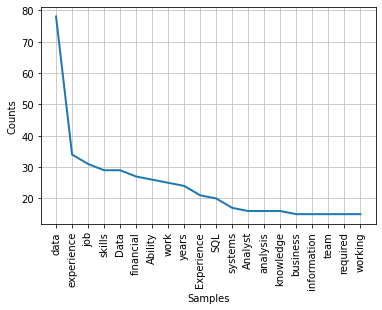

In [32]:
nlp_words=nltk.FreqDist(new_words)
nlp_words.plot(20)
lisx=[]
x=nltk.pos_tag(nlp_words)
for wordz in x:
    if 'NNP' in wordz[1]:
           lisx.append(wordz)

In [33]:
lisx

[('Data', 'NNP'),
 ('Ability', 'NNP'),
 ('Experience', 'NNP'),
 ('SQL', 'NNP'),
 ('Analyst', 'NNP'),
 ('Apply', 'NNP'),
 ('Required', 'NNP'),
 ('CareerBuilder', 'NNP'),
 ('Excel', 'NNP'),
 ('Science', 'NNP'),
 ('Perform', 'NNP'),
 ('Financial', 'NNP'),
 ('National', 'NNP'),
 ('Job', 'NNP'),
 ('Analyze', 'NNP'),
 ('Working', 'NNP'),
 ('Finance', 'NNP'),
 ('Microsoft', 'NNP'),
 ('Location', 'NNP'),
 ('SAP', 'NNP'),
 ('Support', 'NNP'),
 ('Develop', 'NNP'),
 ('Server', 'NNP'),
 ('Developer', 'NNP'),
 ('AWS', 'NNP'),
 ('Computer', 'NNP'),
 ('Education', 'NNP'),
 ('Bachelor', 'NNP'),
 ('United', 'NNP'),
 ('States', 'NNPS'),
 ('Ensure', 'NNP'),
 ('Provide', 'NNP'),
 ('Hadoop', 'NNP'),
 ('Company', 'NNP'),
 ('Report', 'NNP'),
 ('Engineer', 'NNP'),
 ('Chef', 'NNP'),
 ('Knowledge', 'NNP'),
 ('Must', 'NNP'),
 ('Type', 'NNP'),
 ('Pay', 'NNP'),
 ('Benefits', 'NNP'),
 ('Employee', 'NNP'),
 ('Schedule', 'NNP'),
 ('Identify', 'NNP'),
 ('Big', 'NNP'),
 ('Recommended', 'NNP'),
 ('Think', 'NNP'),
 ('Hel